In [1]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# word processing libraries
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
new_word_list = ['flight', 'causing', 'encountered', 'difficult', 'proper', "n't", 'resulting', 'caused', 'making', 's', "'s"]
for word in new_word_list:
    stop_words.add(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("Voice of Customer.csv").set_index('id')
print(f"length of dataset with NILs: {len(df)}")
df = df[df['voice of customer']!='NIL']
print(f"length of dataset w/o NILs: {len(df)}")
df

length of dataset with NILs: 14933
length of dataset w/o NILs: 2163


,satisfaction,satisfaction score,voice of customer
id,,,
72,neutral or dissatisfied,3,The emotional toll of the experience was overw...
93,neutral or dissatisfied,3,The extended wait for flight arrival was highl...
109,neutral or dissatisfied,4,The airline did not provide any updates during...
147,neutral or dissatisfied,4,The airline did not provide any compensation f...
244,neutral or dissatisfied,4,The airline charged excessive fees for baggage.
...,...,...,...
129647,neutral or dissatisfied,3,Faulty and unreliable onboard entertainment sy...
129709,neutral or dissatisfied,4,The cabin lacked proper disposal for used napk...
129721,neutral or dissatisfied,4,The airline lacked efficiency in managing flig...


In [3]:
def text_clean(text):
    text = word_tokenize(text.lower())
    cleaned_text = [word.lower() for word in text if not word in stop_words]
    return ' '.join(cleaned_text)

df['voice of customer modified'] = df['voice of customer'].str.replace(',','')
df['voice of customer modified'] = df['voice of customer modified'].str.replace('.','')
df['voice of customer modified'] = df['voice of customer modified'].str.replace('!','')
df['voice of customer modified'] = df['voice of customer modified'].apply(text_clean)

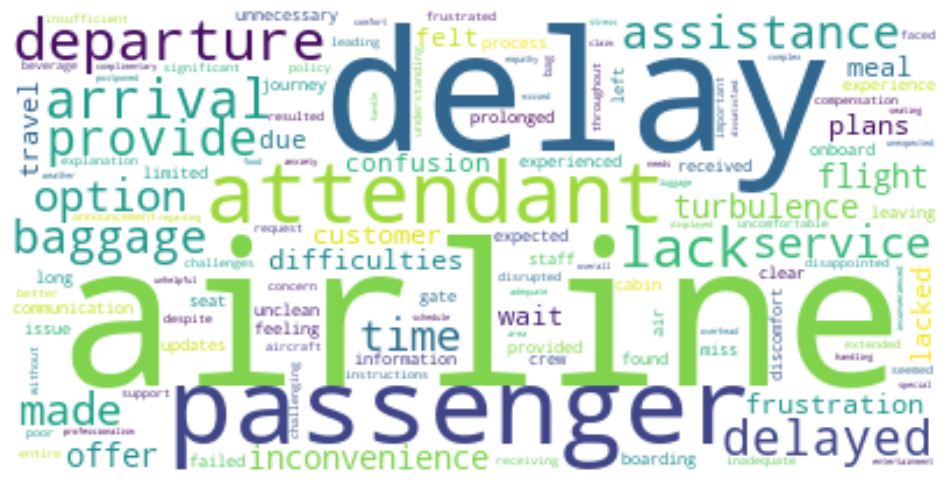

In [4]:
text = " ".join(df['voice of customer modified'])
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='word'>

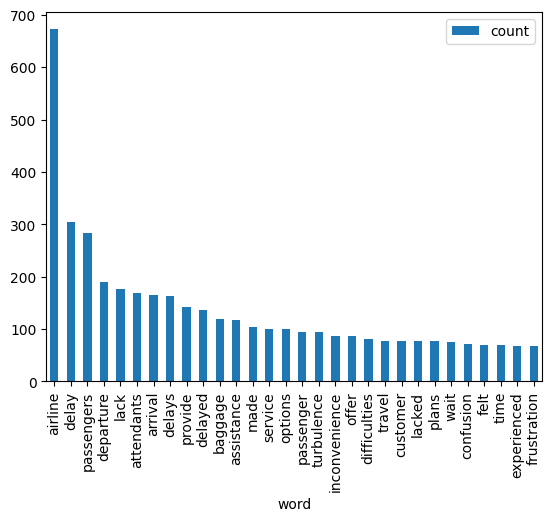

In [6]:
word_dict = {}
for word in text.split():
    if word not in word_dict.keys():
        word_dict[word] = 1
    else:
        word_dict[word] += 1

word_df = pd.DataFrame({'word':word_dict.keys(), 'count': word_dict.values()})
top_words = word_df.sort_values('count', ascending=False).head(30)
top_words.plot.bar(x='word')